<a href="https://colab.research.google.com/github/A-shka/Neural_Nexus_Aashka/blob/main/SolarPlantAnalysis_Aashka_2024UCD2I52.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


This data has been gathered at two solar power plants in India over a 34 day period. It has two pairs of files - each pair has one power generation dataset and one sensor readings dataset. **The aim of this project is to predict the nature of these data files.**

# Importing Libraries

Various libraries are imported to perform tasks.

In [4]:
import pandas as pd
from os import path
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

# Importing Files

The data set contains four files: Plant_1_Generation_Data.csv, Plant_1_Weather_Sensor_Data.csv, Plant_2_Generation_Data.csv and Plant_2_Weather_Sensor_Data.csv. Panda Dataframes are created which are used to load and import these files.

In [5]:
path1="/content/drive/MyDrive/Aashka_Bhavsar_2024UCD2152/Dataset/Plant_1_Generation_Data.csv"
df1=pd.read_csv(path1)
path2="/content/drive/MyDrive/Aashka_Bhavsar_2024UCD2152/Dataset/Plant_1_Weather_Sensor_Data.csv"
df2=pd.read_csv(path2)
path3="/content/drive/MyDrive/Aashka_Bhavsar_2024UCD2152/Dataset/Plant_2_Generation_Data.csv"
df3=pd.read_csv(path3)
path4="/content/drive/MyDrive/Aashka_Bhavsar_2024UCD2152/Dataset/Plant_2_Weather_Sensor_Data.csv"
df4=pd.read_csv(path4)

# Displaying Basic Information

Displaying information like shape, data type, and basic statistics of numeric columns of **Plant_1_Generation_Data.csv**

In [ ]:
print('Shape of file : ',df1.shape)
print()
df1.info()
print("\n\t\t Summary of basic statistical data: \n")
df1.describe()

Shape of file :  (68778, 7)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    68778 non-null  object 
 1   PLANT_ID     68778 non-null  int64  
 2   SOURCE_KEY   68778 non-null  object 
 3   DC_POWER     68778 non-null  float64
 4   AC_POWER     68778 non-null  float64
 5   DAILY_YIELD  68778 non-null  float64
 6   TOTAL_YIELD  68778 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.7+ MB

		 Summary of basic statistical data: 



,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
count,68778.0,68778.000000,68778.000000,68778.000000,6.877800e+04
mean,4135001.0,3147.426211,307.802752,3295.968737,6.978712e+06
std,0.0,4036.457169,394.396439,3145.178309,4.162720e+05
min,4135001.0,0.000000,0.000000,0.000000,6.183645e+06
25%,4135001.0,0.000000,0.000000,0.000000,6.512003e+06
50%,4135001.0,429.000000,41.493750,2658.714286,7.146685e+06
75%,4135001.0,6366.964286,623.618750,6274.000000,7.268706e+06
max,4135001.0,14471.125000,1410.950000,9163.000000,7.846821e+06


Displaying information like shape, data type, and basic statistics of numeric columns of **Plant_1_Weather_Sensor_Data.csv**

In [ ]:
print('Shape of file : ',df2.shape)
print()
df2.info()
print("\n\t\t Summary of basic statistical data: \n")
df2.describe()

Shape of file :  (3182, 6)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3182 non-null   object 
 1   PLANT_ID             3182 non-null   int64  
 2   SOURCE_KEY           3182 non-null   object 
 3   AMBIENT_TEMPERATURE  3182 non-null   float64
 4   MODULE_TEMPERATURE   3182 non-null   float64
 5   IRRADIATION          3182 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 149.3+ KB

		 Summary of basic statistical data: 



,PLANT_ID,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
count,3182.0,3182.000000,3182.000000,3182.000000
mean,4135001.0,25.531606,31.091015,0.228313
std,0.0,3.354856,12.261222,0.300836
min,4135001.0,20.398505,18.140415,0.000000
25%,4135001.0,22.705182,21.090553,0.000000
50%,4135001.0,24.613814,24.618060,0.024653
75%,4135001.0,27.920532,41.307840,0.449588
max,4135001.0,35.252486,65.545714,1.221652


Displaying information like shape, data type, and basic statistics of numeric columns of **Plant_2_Generation_Data.csv**

In [ ]:
print('Shape of file : ',df3.shape)
print()
df3.info()
print("\n\t\t Summary of basic statistical data: \n")
df3.describe()

Shape of file :  (67698, 7)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67698 entries, 0 to 67697
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    67698 non-null  object 
 1   PLANT_ID     67698 non-null  int64  
 2   SOURCE_KEY   67698 non-null  object 
 3   DC_POWER     67698 non-null  float64
 4   AC_POWER     67698 non-null  float64
 5   DAILY_YIELD  67698 non-null  float64
 6   TOTAL_YIELD  67698 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.6+ MB

		 Summary of basic statistical data: 



,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
count,67698.0,67698.000000,67698.000000,67698.000000,6.769800e+04
mean,4136001.0,246.701961,241.277825,3294.890295,6.589448e+08
std,0.0,370.569597,362.112118,2919.448386,7.296678e+08
min,4136001.0,0.000000,0.000000,0.000000,0.000000e+00
25%,4136001.0,0.000000,0.000000,272.750000,1.996494e+07
50%,4136001.0,0.000000,0.000000,2911.000000,2.826276e+08
75%,4136001.0,446.591667,438.215000,5534.000000,1.348495e+09
max,4136001.0,1420.933333,1385.420000,9873.000000,2.247916e+09


Displaying information like shape, data type, and basic statistics of numeric columns of **Plant_2_Weather_Sensor_Data.csv**

In [ ]:
print('Shape of file : ',df4.shape)
print()
df4.info()
print("\n\t\t Summary of basic statistical data: \n")
df4.describe()

Shape of file :  (3259, 6)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3259 entries, 0 to 3258
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3259 non-null   object 
 1   PLANT_ID             3259 non-null   int64  
 2   SOURCE_KEY           3259 non-null   object 
 3   AMBIENT_TEMPERATURE  3259 non-null   float64
 4   MODULE_TEMPERATURE   3259 non-null   float64
 5   IRRADIATION          3259 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 152.9+ KB

		 Summary of basic statistical data: 



,PLANT_ID,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
count,3259.0,3259.000000,3259.000000,3259.000000
mean,4136001.0,28.069400,32.772408,0.232737
std,0.0,4.061556,11.344034,0.312693
min,4136001.0,20.942385,20.265123,0.000000
25%,4136001.0,24.602135,23.716881,0.000000
50%,4136001.0,26.981263,27.534606,0.019040
75%,4136001.0,31.056757,40.480653,0.438717
max,4136001.0,39.181638,66.635953,1.098766


# Handling Missing data

isna().sum() will display **0 if there are no NaN, Null or missing values** in the Data file.

In [ ]:
print("\tPlant 1: Generation Data \n\n",df1.isna().sum())
print("\n\tPlant 1: Weather Data \n\n",df2.isna().sum())
print("\n\tPlant 2: Generation Data \n\n",df3.isna().sum())
print("\n\tPlant 2: Weather Data \n\n",df4.isna().sum())

	Plant 1: Generation Data 

 DATE_TIME      0
PLANT_ID       0
SOURCE_KEY     0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
dtype: int64

	Plant 1: Weather Data 

 DATE_TIME              0
PLANT_ID               0
SOURCE_KEY             0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
dtype: int64

	Plant 2: Generation Data 

 DATE_TIME      0
PLANT_ID       0
SOURCE_KEY     0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
dtype: int64

	Plant 2: Weather Data 

 DATE_TIME              0
PLANT_ID               0
SOURCE_KEY             0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
dtype: int64


**No missing values are found** in any of the files.

# Exploratory Data Analysis (EDA)

# Feature Engineering

**Adding features**

In [ ]:
df1['DAY'] = pd.to_datetime(df1['DATE_TIME']).dt.day
df1['TIME'] = pd.to_datetime(df1['DATE_TIME']).dt.time
df2['DAY'] = pd.to_datetime(df2['DATE_TIME']).dt.day
df2['TIME'] = pd.to_datetime(df2['DATE_TIME']).dt.time
df3['DAY'] = pd.to_datetime(df1['DATE_TIME']).dt.day
df3['TIME'] = pd.to_datetime(df1['DATE_TIME']).dt.time
df4['DAY'] = pd.to_datetime(df2['DATE_TIME']).dt.day
df4['TIME'] = pd.to_datetime(df2['DATE_TIME']).dt.time

<ipython-input-5-5d93a7f60bb1>:1: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df1['DAY'] = pd.to_datetime(df1['DATE_TIME']).dt.day
<ipython-input-5-5d93a7f60bb1>:2: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df1['TIME'] = pd.to_datetime(df1['DATE_TIME']).dt.time
<ipython-input-5-5d93a7f60bb1>:5: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df3['DAY'] = pd.to_datetime(df1['DATE_TIME']).dt.day
<ipython-input-5-5d93a7f60bb1>:6: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df3['TIME'] = pd.to_datetim

Normalize numerical columns using **Min-Max Scaling**

In [ ]:
minmaxsc = MinMaxScaler()

cols1 = ['DC_POWER', 'AC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD']
df1[cols1] = minmaxsc.fit_transform(df1[cols1])
print("\nGeneration data of plant 1 after MinMaxScaler:\n")
print(df1.head())

cols2 = ['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']
df2[cols2] = minmaxsc.fit_transform(df2[cols2])
print("\nWeather Sensor data of plant 1 after MinMaxScaler:\n")
print(df2.head())

df3[cols1] = minmaxsc.fit_transform(df3[cols1])
print("\nGenerartion data of plant 2 after MinMaxScaler:\n")
print(df3.head())

df4[cols2] = minmaxsc.fit_transform(df4[cols2])
print("\nWeather Sensor data of plant 2 after MinMaxScaler:\n")
print(df4.head())


Generation data of plant 1 after MinMaxScaler:

          DATE_TIME  PLANT_ID       SOURCE_KEY  DC_POWER  AC_POWER  \
0  15-05-2020 00:00   4135001  1BY6WEcLGh8j5v7       0.0       0.0   
1  15-05-2020 00:00   4135001  1IF53ai7Xc0U56Y       0.0       0.0   
2  15-05-2020 00:00   4135001  3PZuoBAID5Wc2HD       0.0       0.0   
3  15-05-2020 00:00   4135001  7JYdWkrLSPkdwr4       0.0       0.0   
4  15-05-2020 00:00   4135001  McdE0feGgRqW7Ca       0.0       0.0   

   DAILY_YIELD  TOTAL_YIELD  DAY      TIME  
0          0.0     0.045644   15  00:00:00  
1          0.0     0.000000   15  00:00:00  
2          0.0     0.483481   15  00:00:00  
3          0.0     0.853376   15  00:00:00  
4          0.0     0.586420   15  00:00:00  

Weather Sensor data of plant 1 after MinMaxScaler:

             DATE_TIME  PLANT_ID       SOURCE_KEY  AMBIENT_TEMPERATURE  \
0  2020-05-15 00:00:00   4135001  HmiyD2TTLFNqkNe             0.322190   
1  2020-05-15 00:15:00   4135001  HmiyD2TTLFNqkNe          

Encode categorical variables using **Lable Encoding**, taking Source Key feature to be encoded.

In [ ]:
label_encoder = LabelEncoder()

print("\t\t\tEncoding Source Key for Generation data of plant 1\n")
df1['SOURCE_KEY_encoded'] = label_encoder.fit_transform(df1['SOURCE_KEY'])
print(df1.head())

print("\n\t\t\tEncoding Source Key for Weather Sensor data of plant 1\n")
df2['SOURCE_KEY_encoded'] = label_encoder.fit_transform(df2['SOURCE_KEY'])
print(df2.head())

print("\n\t\t\tEncoding Source Key for Generation data of plant 2\n")
df3['SOURCE_KEY_encoded'] = label_encoder.fit_transform(df3['SOURCE_KEY'])
print(df3.head())

print("\n\t\t\tEncoding Source Key for Weather Sensor data of plant 2\n")
df4['SOURCE_KEY_encoded'] = label_encoder.fit_transform(df4['SOURCE_KEY'])
print(df4.head())

			Encoding Source Key for Generation data of plant 1

          DATE_TIME  PLANT_ID       SOURCE_KEY  DC_POWER  AC_POWER  \
0  15-05-2020 00:00   4135001  1BY6WEcLGh8j5v7       0.0       0.0   
1  15-05-2020 00:00   4135001  1IF53ai7Xc0U56Y       0.0       0.0   
2  15-05-2020 00:00   4135001  3PZuoBAID5Wc2HD       0.0       0.0   
3  15-05-2020 00:00   4135001  7JYdWkrLSPkdwr4       0.0       0.0   
4  15-05-2020 00:00   4135001  McdE0feGgRqW7Ca       0.0       0.0   

   DAILY_YIELD  TOTAL_YIELD  DAY      TIME  SOURCE_KEY_encoded  
0          0.0     0.045644   15  00:00:00                   0  
1          0.0     0.000000   15  00:00:00                   1  
2          0.0     0.483481   15  00:00:00                   2  
3          0.0     0.853376   15  00:00:00                   3  
4          0.0     0.586420   15  00:00:00                   4  

			Encoding Source Key for Weather Sensor data of plant 1

             DATE_TIME  PLANT_ID       SOURCE_KEY  AMBIENT_TEMPERATURE  \


# Graphic Visulaization

# *Plant 1*

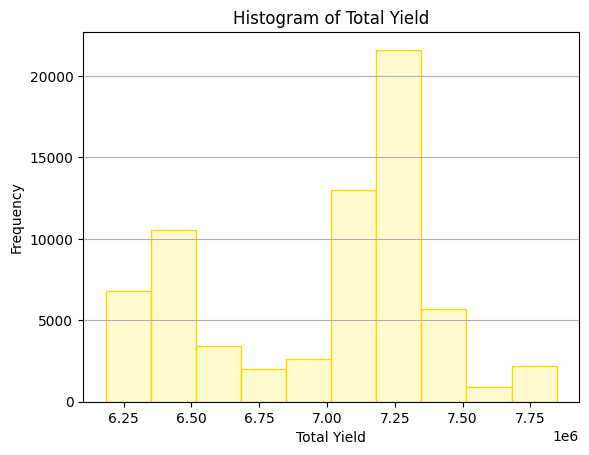

In [ ]:
# Histogram of Total Yield generated by the plant 1

plt.hist(df1['TOTAL_YIELD'], color='LemonChiffon', edgecolor='gold')
plt.xlabel('Total Yield')
plt.ylabel('Frequency')
plt.title('Histogram of Total Yield')
plt.grid(axis='y')
plt.show()

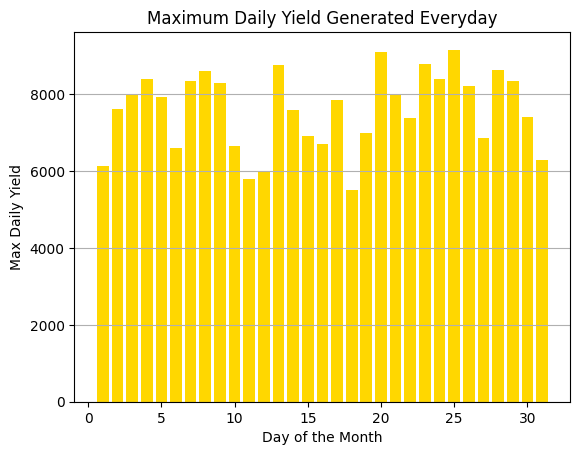

In [ ]:
# Bar graph of Maximum Daily Yield Generated Everyday by plant 1

max_daily_yield = df1.groupby('DAY')['DAILY_YIELD'].max()
plt.bar(max_daily_yield.index, max_daily_yield.values, color='gold')
plt.xlabel('Day of the Month')
plt.ylabel('Max Daily Yield')
plt.title('Maximum Daily Yield Generated Everyday')
plt.grid(axis='y')
plt.show()

<ipython-input-8-505e6ae4b67d>:4: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  sourcefile['time']=pd.to_datetime(sourcefile['DATE_TIME']).dt.time


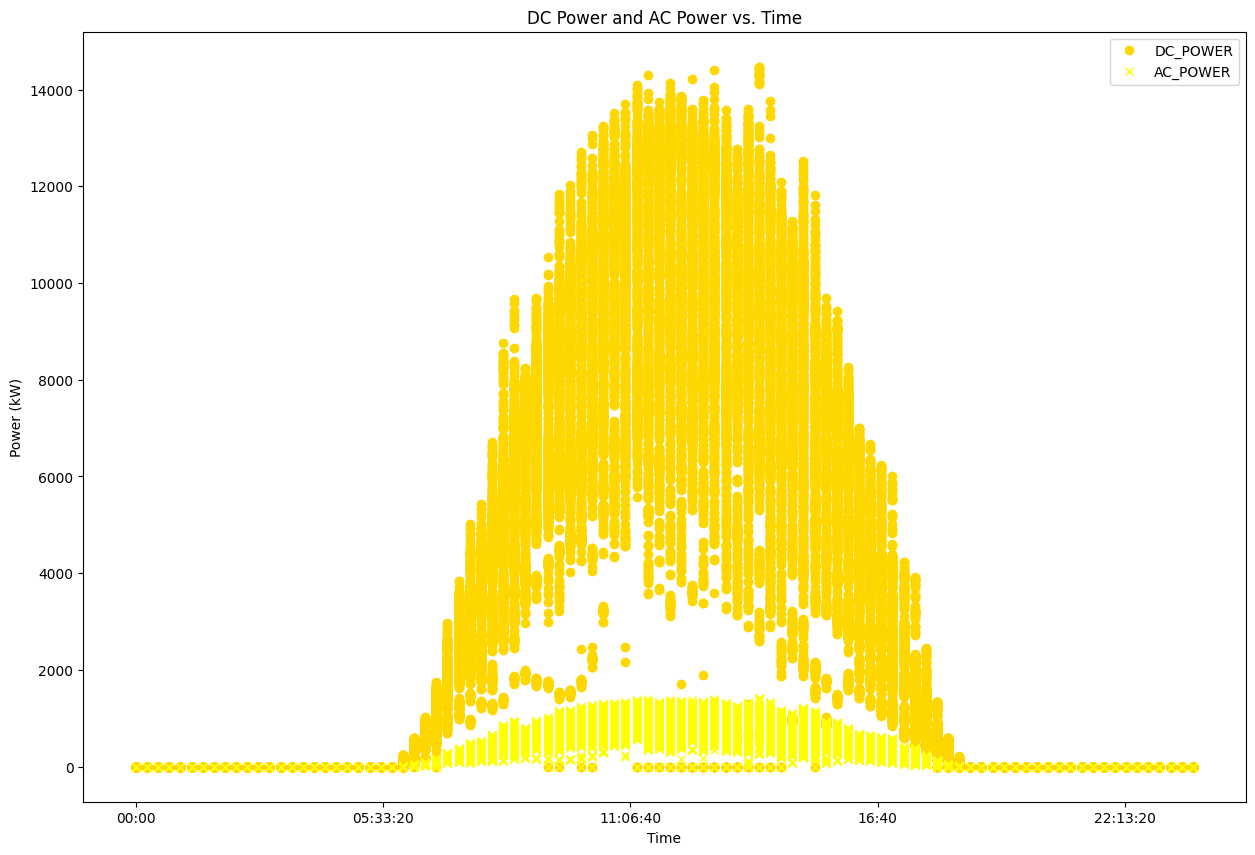

In [ ]:
# Scatter Plot of DC and AC Power vs Time of plant 1

sourcefile=df1.copy()
sourcefile['time']=pd.to_datetime(sourcefile['DATE_TIME']).dt.time
sourcefile.set_index('time')[['DC_POWER','AC_POWER']].plot(style=['o','x'],color=['gold','yellow'],figsize=(15,10))
plt.title('DC Power and AC Power vs. Time')
plt.ylabel('Power (kW)')
plt.xlabel('Time')
plt.show()

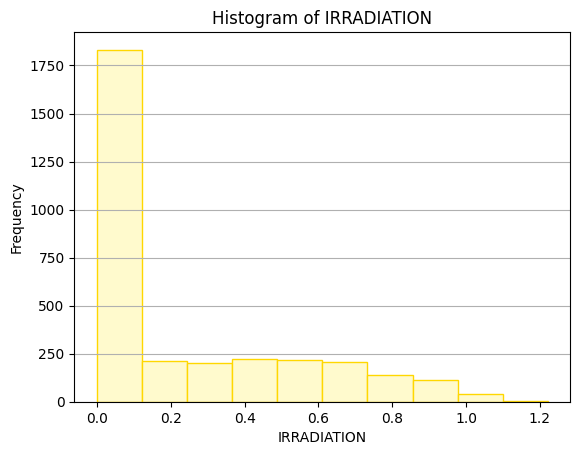

In [ ]:
# Histogram of Irradiation of plant 1

plt.hist(df2['IRRADIATION'], color='LemonChiffon', edgecolor='gold')
plt.xlabel('IRRADIATION')
plt.ylabel('Frequency')
plt.title('Histogram of IRRADIATION')
plt.grid(axis='y')
plt.show()

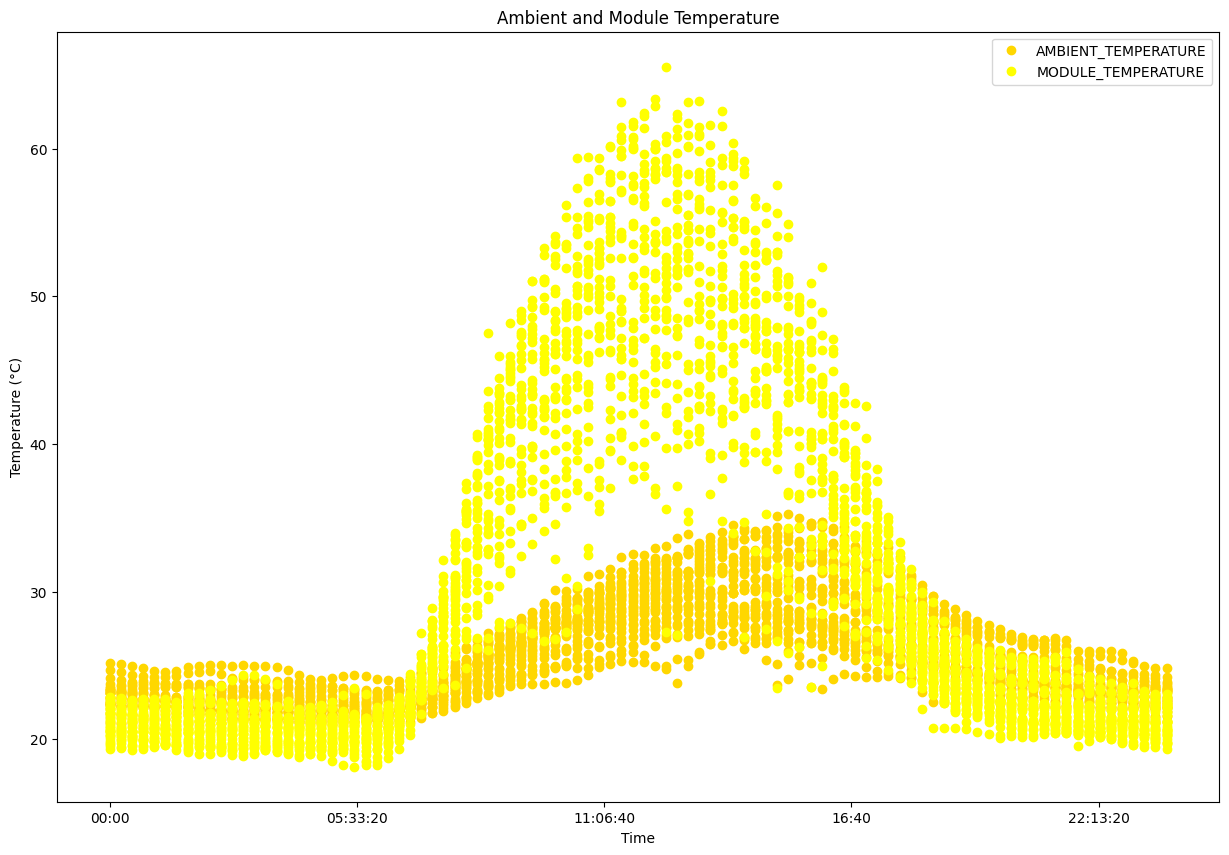

In [ ]:
#Scatter Plot of Ambient and Module Temperature vs Time of plant 1

sourcefile=df2.copy()
sourcefile['time']=pd.to_datetime(sourcefile['DATE_TIME']).dt.time
sourcefile.set_index('time')[['AMBIENT_TEMPERATURE','MODULE_TEMPERATURE']].plot(style='o',color=['gold','yellow'],figsize=(15,10))
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.title('Ambient and Module Temperature')
plt.show()

# *Plant 2*

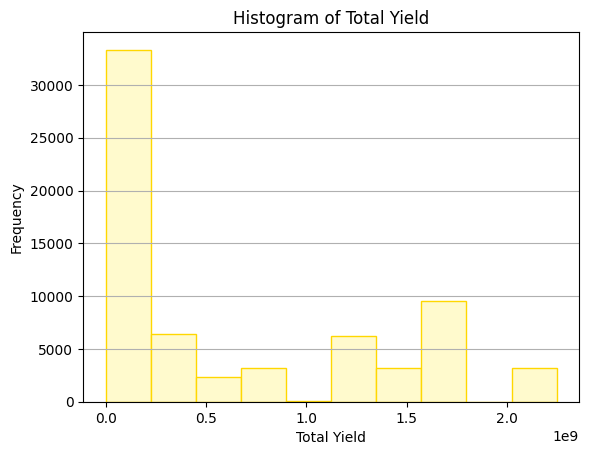

In [ ]:
# Histogram of Total Yield generated by the plant 2

plt.hist(df3['TOTAL_YIELD'], color='LemonChiffon', edgecolor='gold')
plt.xlabel('Total Yield')
plt.ylabel('Frequency')
plt.title('Histogram of Total Yield')
plt.grid(axis='y')
plt.show()

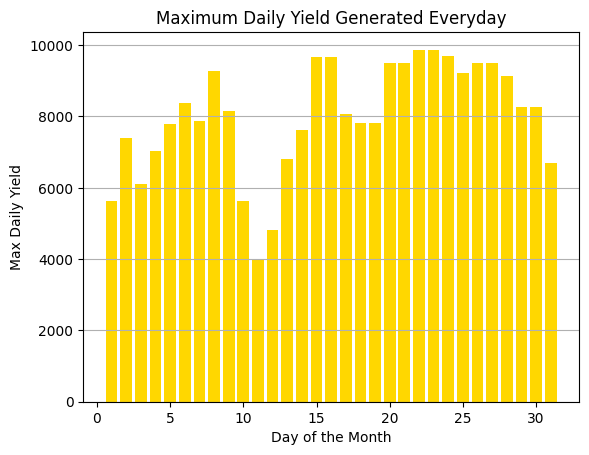

In [ ]:
# Bar graph of Maximum Daily Yield Generated Everyday by plant 2

max_daily_yield = df3.groupby('DAY')['DAILY_YIELD'].max()
plt.bar(max_daily_yield.index, max_daily_yield.values, color='gold')
plt.xlabel('Day of the Month')
plt.ylabel('Max Daily Yield')
plt.title('Maximum Daily Yield Generated Everyday')
plt.grid(axis='y')
plt.show()

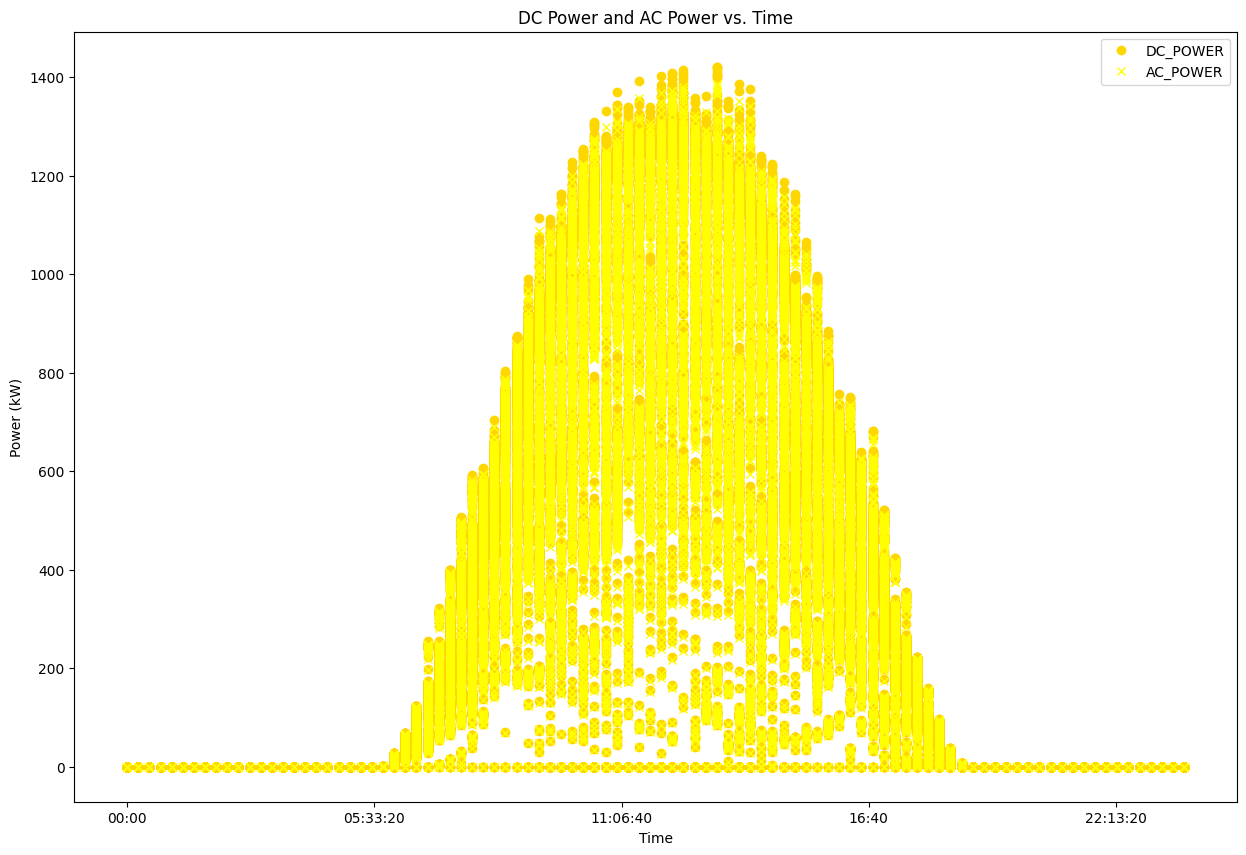

In [ ]:
# Scatter Plot of DC and AC Power vs Time of Plant 2

sourcefile=df3.copy()
sourcefile['time']=pd.to_datetime(sourcefile['DATE_TIME']).dt.time
sourcefile.set_index('time')[['DC_POWER','AC_POWER']].plot(style=['o','x'],color=['gold','yellow'],figsize=(15,10))
plt.title('DC Power and AC Power vs. Time')
plt.ylabel('Power (kW)')
plt.xlabel('Time')
plt.show()

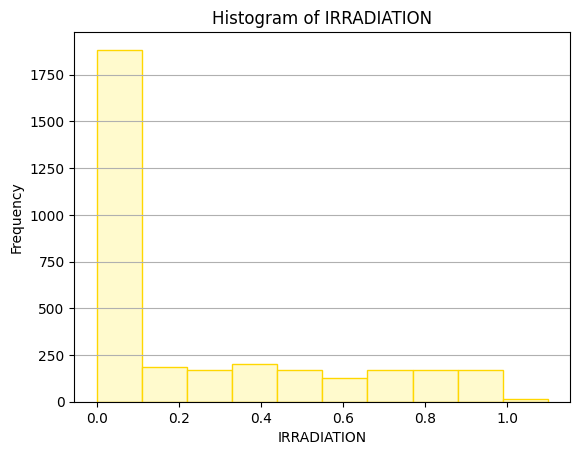

In [ ]:
# Histogram of Irradiation of plant 2

plt.hist(df4['IRRADIATION'], color='LemonChiffon', edgecolor='gold')
plt.xlabel('IRRADIATION')
plt.ylabel('Frequency')
plt.title('Histogram of IRRADIATION')
plt.grid(axis='y')
plt.show()

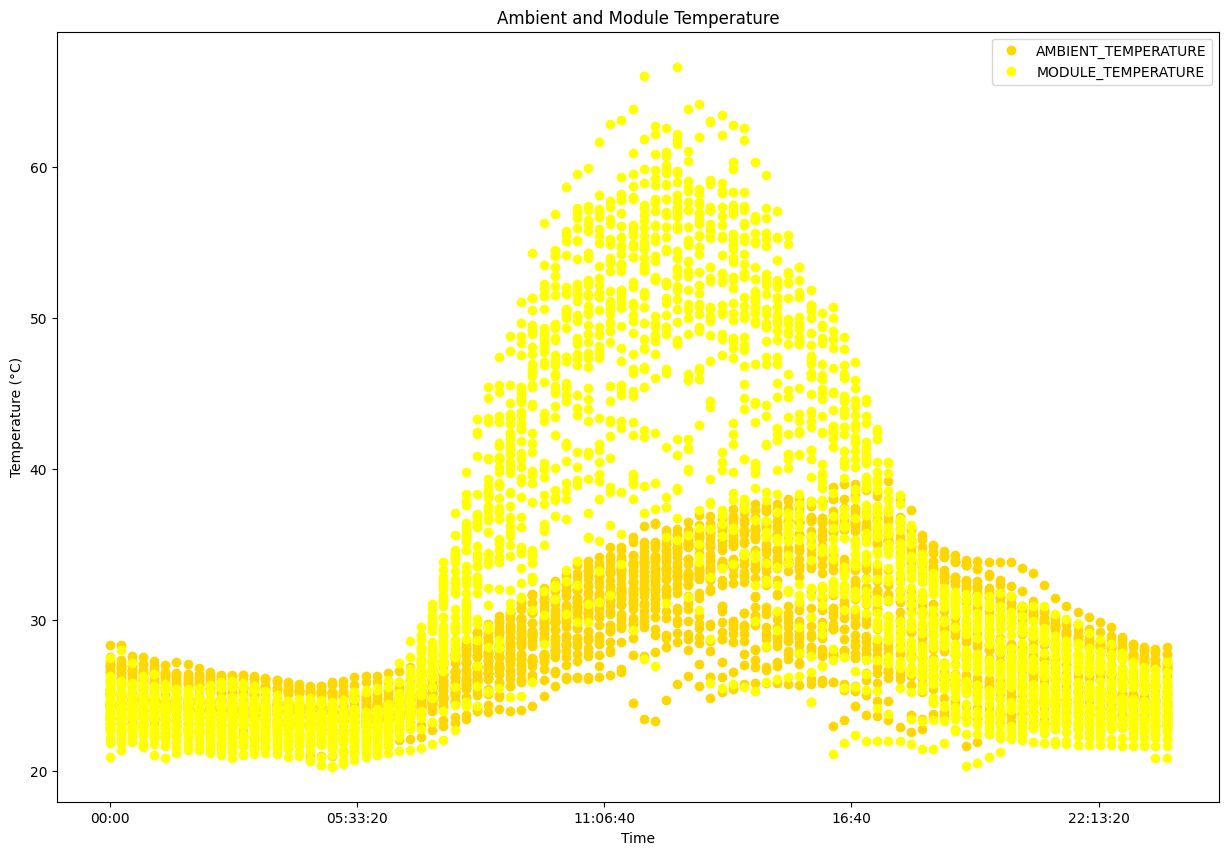

In [ ]:
#Scatter Plot of Ambient and Module Temperature vs Time of plant 2

sourcefile=df4.copy()
sourcefile['time']=pd.to_datetime(sourcefile['DATE_TIME']).dt.time
sourcefile.set_index('time')[['AMBIENT_TEMPERATURE','MODULE_TEMPERATURE']].plot(style='o',color=['gold','yellow'],figsize=(15,10))
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.title('Ambient and Module Temperature')
plt.show()

# Train-Test Split

Spliting the dataset into 80% training and 20% testing to evaluate the performance of the models that will be tested further.

In [6]:
# For Generation Data of Plant 1
X1 = df1[['DC_POWER', 'AC_POWER']]
y1 = df1['DAILY_YIELD']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)
print("X_train:\n", X1_train)
print("\nX_test:\n", X1_test)
print("\ny_train:\n", y1_train)
print("\ny_test:\n", y1_test)

X_train:
           DC_POWER     AC_POWER
28764      0.00000     0.000000
11405      0.00000     0.000000
12052  11223.57143  1095.585714
51899      0.00000     0.000000
13363      0.00000     0.000000
...            ...          ...
37194      0.00000     0.000000
6265       0.00000     0.000000
54886   4509.50000   442.650000
860     6008.37500   588.775000
15795   7756.25000   759.287500

[55022 rows x 2 columns]

X_test:
            DC_POWER     AC_POWER
53615      0.000000     0.000000
25461      0.000000     0.000000
5246    7333.875000   718.062500
33499      0.000000     0.000000
4699    7665.500000   750.437500
...             ...          ...
5784       0.000000     0.000000
40305  10364.714290  1011.842857
52613   4396.285714   431.600000
18514   3352.000000   328.537500
49975      0.000000     0.000000

[13756 rows x 2 columns]

y_train:
 28764    8210.000000
11405    8982.000000
12052    2425.285714
51899    8309.000000
13363       0.000000
            ...     
37194    73

In [7]:
# For Weather Sensor Data of Plant 1
X2 = df2[['AMBIENT_TEMPERATURE','MODULE_TEMPERATURE']]
y2 = df2[['IRRADIATION']]
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)
print("X_train:\n", X2_train)
print("\nX_test:\n", X2_test)
print("\ny_train:\n", y2_train)
print("\ny_test:\n", y2_test)

X_train:
       AMBIENT_TEMPERATURE  MODULE_TEMPERATURE
2202            25.268251           23.117767
533             25.099306           22.315304
2530            21.679722           19.959000
3012            22.571179           21.587781
1747            22.704484           21.236882
...                   ...                 ...
1095            23.595738           22.002624
1130            29.157198           47.721989
1294            22.345734           28.182127
860             33.762349           52.985213
3174            22.563179           21.164713

[2545 rows x 2 columns]

X_test:
       AMBIENT_TEMPERATURE  MODULE_TEMPERATURE
1027            26.999526           43.464439
2844            26.847070           46.031458
785             26.925490           25.399935
411             27.322760           45.740714
1103            23.867255           21.502303
...                   ...                 ...
282             20.989665           20.385624
2621            22.117505          

In [8]:
# For Generation Data of Plant 2
X3 = df3[['DC_POWER', 'AC_POWER']]
y3 = df3['DAILY_YIELD']
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)
print("X_train:\n", X3_train)
print("\nX_test:\n", X3_test)
print("\ny_train:\n", y3_train)
print("\ny_test:\n", y3_test)

X_train:
           DC_POWER     AC_POWER
9976      0.000000     0.000000
48525     0.000000     0.000000
16295  1103.340000  1075.753333
14081     0.000000     0.000000
52728     0.000000     0.000000
...            ...          ...
37194   118.726667   115.780000
6265      0.000000     0.000000
54886     0.000000     0.000000
860    1048.180000  1024.633333
15795     0.000000     0.000000

[54158 rows x 2 columns]

X_test:
           DC_POWER     AC_POWER
24788  1090.242857  1063.557143
64465   740.613333   724.826667
5862      0.000000     0.000000
13626     0.000000     0.000000
42307     0.000000     0.000000
...            ...          ...
43180     0.000000     0.000000
21041    18.546667    17.906667
55818   480.693333   471.533333
28035     0.000000     0.000000
38455     0.000000     0.000000

[13540 rows x 2 columns]

y_train:
 9976     1909.000000
48525    3027.000000
16295    4108.333333
14081       0.000000
52728    5423.000000
            ...     
37194    3376.466667
62

In [9]:
# For Weather Sensor Data of Plant 2
X4 = df4[['AMBIENT_TEMPERATURE','MODULE_TEMPERATURE']]
y4 = df4[['IRRADIATION']]
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=42)
print("X_train:\n", X4_train)
print("\nX_test:\n", X4_test)
print("\ny_train:\n", y4_train)
print("\ny_test:\n", y4_test)

X_train:
       AMBIENT_TEMPERATURE  MODULE_TEMPERATURE
2951            26.391504           26.258663
2555            28.792319           31.002017
2509            24.379036           22.848119
3016            30.406593           40.686538
1459            23.583341           21.981009
...                   ...                 ...
1095            31.986550           51.735156
1130            32.573019           31.081793
1294            33.820847           57.216887
860             26.945311           25.522681
3174            24.148901           23.613637

[2607 rows x 2 columns]

X_test:
       AMBIENT_TEMPERATURE  MODULE_TEMPERATURE
1569            29.230036           37.512935
134             32.115261           56.264714
844             33.442757           31.280740
2247            30.802705           48.107687
3030            28.738912           35.475339
...                   ...                 ...
1263            25.187318           23.984976
472             24.172946          

# Prediction using ML models

In [10]:
models ={"Linear Regression": LinearRegression(),
    "KNN": KNeighborsRegressor(n_neighbors=5),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost":xgb.XGBRegressor(objective="reg:squarederror",n_estimators=100,random_state=42)}

Running the ML Model from the above created dictionary on all four data files to test the accuracy of the models. The dictionary stores the results with the model names as keys and values as nested dictionaries with keys as the respective metrics for comparision and values of the metrics.

In [13]:
# For Generation Data of Plant 1
results1={}
for name, model in models.items():
  model.fit(X1_train, y1_train)
  y1_pred=model.predict(X1_test)
  mse=mean_squared_error(y1_test,y1_pred)
  rmse=np.sqrt(mse)
  r2=r2_score(y1_test,y1_pred)
  results1[name]={"MSE":mse,"RMSE":rmse,"R2":r2}
results_df1=pd.DataFrame(results1).T
results_df1

,MSE,RMSE,R2
Linear Regression,9.815954e+06,3133.042216,0.005780
KNN,1.244708e+07,3528.041323,-0.260717
Decision Tree,1.313867e+07,3624.730273,-0.330765
Random Forest,1.087862e+07,3298.275594,-0.101854
XGBoost,9.684609e+06,3112.010511,0.019083


In [24]:
best_model_name= results_df1["RMSE"].idxmax()
best_model=models[best_model_name]
best_model_name

'Decision Tree'

By running the code, taking RMSE value to compare, we get that **Decision Tree** is the best ML model for this data file. This can also be infered from the bar graph plotted below.

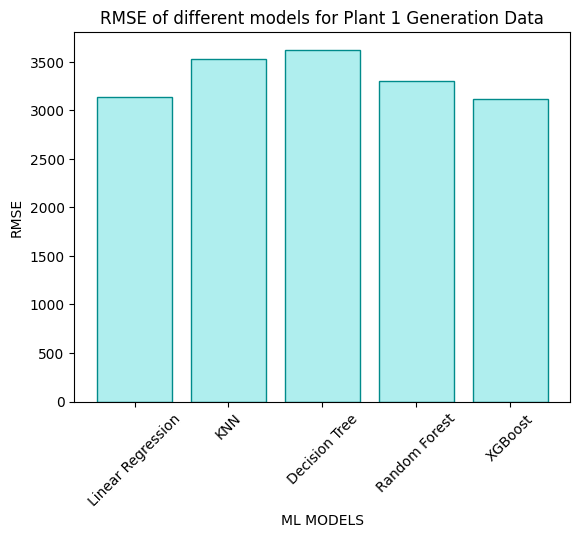

In [41]:
# Plotting bar graph between RMSE and Models for Plant 1 Generation Data

plt.bar(results_df1.index, results_df1['RMSE'], color='PaleTurquoise',edgecolor='DarkCyan')
plt.xlabel("ML MODELS")
plt.ylabel("RMSE")
plt.title("RMSE of different models for Plant 1 Generation Data")
plt.xticks(rotation=45)
plt.show()

In [18]:
# For Weather Sensor Data of Plant 1
results2={}
for name, model in models.items():
  model.fit(X2_train, y2_train)
  y2_pred=model.predict(X2_test)
  mse=mean_squared_error(y2_test,y2_pred)
  rmse=np.sqrt(mse)
  r2=r2_score(y2_test,y2_pred)
  results2[name]={"MSE":mse,"RMSE":rmse,"R2":r2}
results_df2=pd.DataFrame(results2).T
results_df2

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


,MSE,RMSE,R2
Linear Regression,0.003317,0.057597,0.963414
KNN,0.003724,0.061027,0.958927
Decision Tree,0.007078,0.084128,0.921946
Random Forest,0.003534,0.059447,0.961026
XGBoost,0.004175,0.064613,0.953958


In [42]:
best_model_name= results_df2["RMSE"].idxmax()
best_model=models[best_model_name]
best_model_name

'Decision Tree'

By running the code, taking RMSE value to compare, we get that **Decision Tree** is the best ML model for this data file. This can also be infered from the bar graph plotted below.

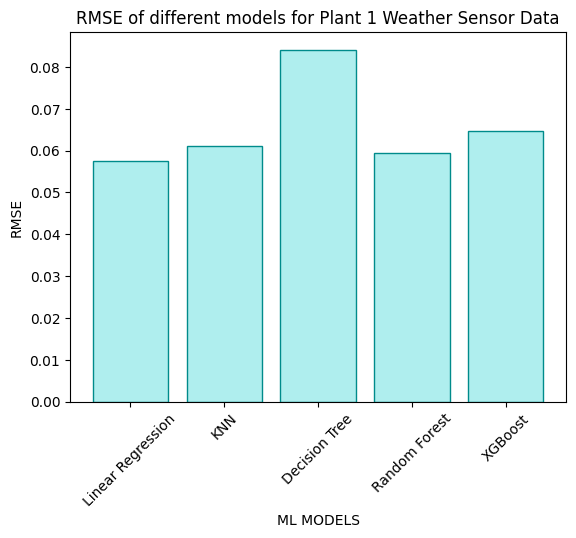

In [43]:
# Plotting bar graph between RMSE and Models for Plant 1 Weather Sensor Data

plt.bar(results_df2.index, results_df2['RMSE'], color='PaleTurquoise',edgecolor='DarkCyan')
plt.xlabel("ML MODELS")
plt.ylabel("RMSE")
plt.title("RMSE of different models for Plant 1 Weather Sensor Data")
plt.xticks(rotation=45)
plt.show()

In [21]:
# For Generation Data of Plant 2
results3={}
for name, model in models.items():
  model.fit(X3_train, y3_train)
  y3_pred=model.predict(X3_test)
  mse=mean_squared_error(y3_test,y3_pred)
  rmse=np.sqrt(mse)
  r2=r2_score(y3_test,y3_pred)
  results3[name]={"MSE":mse,"RMSE":rmse,"R2":r2}
results_df3=pd.DataFrame(results3).T
results_df3

,MSE,RMSE,R2
Linear Regression,8.525861e+06,2919.907687,0.008423
KNN,8.934251e+06,2989.021706,-0.039074
Decision Tree,1.138492e+07,3374.154261,-0.324092
Random Forest,9.403092e+06,3066.446215,-0.093601
XGBoost,8.411244e+06,2900.214521,0.021753


In [44]:
best_model_name= results_df3["RMSE"].idxmax()
best_model=models[best_model_name]
best_model_name

'Decision Tree'

By running the code, taking RMSE value to compare, we get that **Decision Tree** is the best ML model for this data file. This can also be infered from the bar graph plotted below.

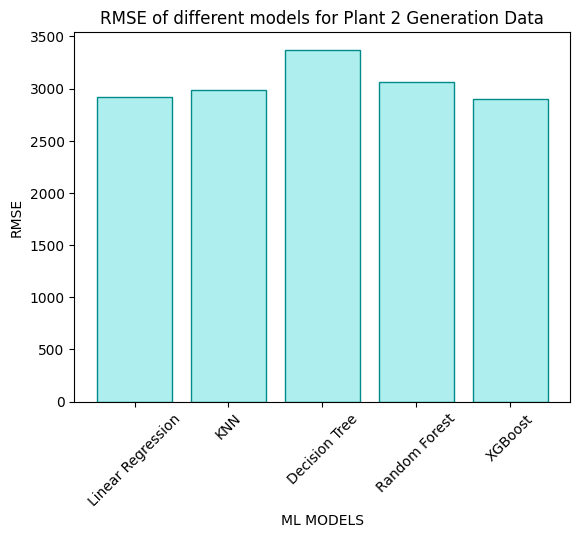

In [50]:
# Plotting bar graph between RMSE and Models for Plant 2 Generation Data

plt.bar(results_df3.index, results_df3['RMSE'], color='PaleTurquoise',edgecolor='DarkCyan')
plt.xlabel("ML MODELS")
plt.ylabel("RMSE")
plt.title("RMSE of different models for Plant 2 Generation Data")
plt.xticks(rotation=45)
plt.show()

In [22]:
# For Weather Sensor Data of Plant 2
results4={}
for name, model in models.items():
  model.fit(X4_train, y4_train)
  y4_pred=model.predict(X4_test)
  mse=mean_squared_error(y4_test,y4_pred)
  rmse=np.sqrt(mse)
  r2=r2_score(y4_test,y4_pred)
  results4[name]={"MSE":mse,"RMSE":rmse,"R2":r2}
results_df4=pd.DataFrame(results4).T
results_df4

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


,MSE,RMSE,R2
Linear Regression,0.004250,0.065195,0.956055
KNN,0.003750,0.061239,0.961226
Decision Tree,0.005924,0.076968,0.938750
Random Forest,0.003752,0.061256,0.961205
XGBoost,0.004233,0.065061,0.956235


In [48]:
best_model_name= results_df4["RMSE"].idxmax()
best_model=models[best_model_name]
best_model_name

'Decision Tree'

By running the code, taking RMSE value to compare, we get that **Decision Tree** is the best ML model for this data file. This can also be infered from the bar graph plotted below.

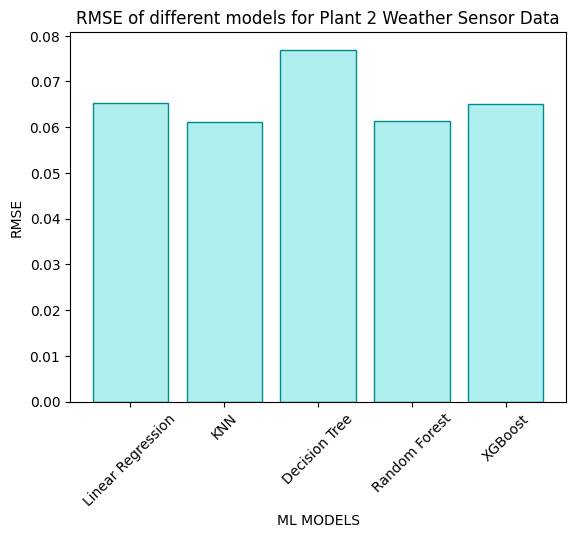

In [49]:
# Plotting bar graph between RMSE and Models for Plant 2 Weather Sensor Data

plt.bar(results_df4.index, results_df4['RMSE'], color='PaleTurquoise',edgecolor='DarkCyan')
plt.xlabel("ML MODELS")
plt.ylabel("RMSE")
plt.title("RMSE of different models for Plant 2 Weather Sensor Data")
plt.xticks(rotation=45)
plt.show()